# Making pipelines 
Dataset A

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt

#import custom functions
import Configure_Dataset
import Impute
import Normalize
import Combine
import Transform
import copy

In [2]:
data, y1, y2 = Configure_Dataset.configure('Competition1_raw_data.xlsx')

In [3]:
data.head()

,C1,C2,C4,C7,%_long_sentences,%_long_words,%_positive_words,%_negative_words,%_uncertain_words,C3',C5',C6',one_hot_Manufacturing,one_hot_Other,one_hot_Public Services
0,122.0,1.0,0.029074,51.345,0.640426,0.054250,0.004875,0.009199,0.010929,1,3.864345,11.111111,1,0,0
1,259.0,0.0,-0.013352,25.936,0.644753,0.051395,0.003258,0.011105,0.010876,0,12.028832,0.000000,1,0,0
2,90.0,1.0,0.020715,7.378,0.636816,0.061764,0.011593,0.006271,0.011403,0,3.369134,0.000000,1,0,0
3,209.0,1.0,0.020023,8.526,0.539634,0.061630,0.009686,0.007144,0.013319,0,3.299697,0.000000,1,0,0
4,80.0,1.0,-0.034895,632.298,0.587413,0.048550,0.004518,0.010047,0.011261,1,3.726269,5.000000,0,0,1


In [4]:
def apply_day_bins(col):
    #bin the days column into equal height bins
    
    q1 = data['C1'].describe()['25%']
    q2 = data['C1'].describe()['50%']
    q3 = data['C1'].describe()['75%']
    
    
    if col <= q1:
        return(1)
    if col > q1 and col <=q2: 
        return(2)
    if col > q2 and col <= q3:
        return(3)
    else:
        return(4)
    
  

In [5]:
#bins 'C1' column into equal height bins
data['C1'] = data['C1'].apply(apply_day_bins)


In [6]:
data_columns = data.columns
data_columns

Index(['C1', 'C2', 'C4', 'C7', '%_long_sentences', '%_long_words',
       '%_positive_words', '%_negative_words', '%_uncertain_words', 'C3'',
       'C5'', 'C6'', 'one_hot_Manufacturing', 'one_hot_Other',
       'one_hot_Public Services'],
      dtype='object')

In [7]:
data.head(10)

,C1,C2,C4,C7,%_long_sentences,%_long_words,%_positive_words,%_negative_words,%_uncertain_words,C3',C5',C6',one_hot_Manufacturing,one_hot_Other,one_hot_Public Services
0,3,1.0,0.029074,51.345,0.640426,0.054250,0.004875,0.009199,0.010929,1,3.864345,11.111111,1,0,0
1,4,0.0,-0.013352,25.936,0.644753,0.051395,0.003258,0.011105,0.010876,0,12.028832,0.000000,1,0,0
2,2,1.0,0.020715,7.378,0.636816,0.061764,0.011593,0.006271,0.011403,0,3.369134,0.000000,1,0,0
3,4,1.0,0.020023,8.526,0.539634,0.061630,0.009686,0.007144,0.013319,0,3.299697,0.000000,1,0,0
4,1,1.0,-0.034895,632.298,0.587413,0.048550,0.004518,0.010047,0.011261,1,3.726269,5.000000,0,0,1
5,2,1.0,-0.057556,197.591,0.643137,0.045280,0.003445,0.005334,0.010056,1,5.724394,0.000000,0,0,1
6,3,1.0,0.004106,5.146,0.765657,0.044295,0.005204,0.006727,0.008567,0,3.463095,0.000000,1,0,0
7,2,0.0,0.040620,NaN,0.826347,NaN,0.004899,0.010689,0.010868,0,2.421469,0.000000,1,0,0
8,2,1.0,-0.029316,279.600,0.540323,0.061905,0.003915,0.008371,0.015797,0,4.816591,0.000000,0,0,1
9,2,1.0,-0.024925,494.008,0.514286,0.050252,0.008868,0.009853,0.016094,1,3.056608,0.000000,1,0,0


In [8]:
data = Impute.impute_knn(data, 3)
data.columns = data_columns

/home/jupyter-khickey/.local/lib/python3.6/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [9]:
# get dummy one-hot encode columns for the values in C1 bins
dummies = pd.get_dummies(data['C1'], prefix = 'days_quantile')
data = pd.concat([data, dummies], axis = 1)
data = data.drop('C1', axis=1)

In [10]:
data.head()

,C2,C4,C7,%_long_sentences,%_long_words,%_positive_words,%_negative_words,%_uncertain_words,C3',C5',C6',one_hot_Manufacturing,one_hot_Other,one_hot_Public Services,days_quantile_1.0,days_quantile_2.0,days_quantile_3.0,days_quantile_4.0
0,1.0,0.029074,51.345,0.640426,0.054250,0.004875,0.009199,0.010929,1.0,3.864345,11.111111,1.0,0.0,0.0,0,0,1,0
1,0.0,-0.013352,25.936,0.644753,0.051395,0.003258,0.011105,0.010876,0.0,12.028832,0.000000,1.0,0.0,0.0,0,0,0,1
2,1.0,0.020715,7.378,0.636816,0.061764,0.011593,0.006271,0.011403,0.0,3.369134,0.000000,1.0,0.0,0.0,0,1,0,0
3,1.0,0.020023,8.526,0.539634,0.061630,0.009686,0.007144,0.013319,0.0,3.299697,0.000000,1.0,0.0,0.0,0,0,0,1
4,1.0,-0.034895,632.298,0.587413,0.048550,0.004518,0.010047,0.011261,1.0,3.726269,5.000000,0.0,0.0,1.0,1,0,0,0


In [11]:
#create dataframe of non-binary features 
#taking out all of the binary variables
#dont want them to be transformed, manipulated 

cont_data = data.drop(columns = ["C2", "C3'", "one_hot_Manufacturing", "one_hot_Other", "one_hot_Public Services", "days_quantile_1.0",
                                "days_quantile_2.0", "days_quantile_3.0", "days_quantile_4.0"])

cont_data.head()

,C4,C7,%_long_sentences,%_long_words,%_positive_words,%_negative_words,%_uncertain_words,C5',C6'
0,0.029074,51.345,0.640426,0.054250,0.004875,0.009199,0.010929,3.864345,11.111111
1,-0.013352,25.936,0.644753,0.051395,0.003258,0.011105,0.010876,12.028832,0.000000
2,0.020715,7.378,0.636816,0.061764,0.011593,0.006271,0.011403,3.369134,0.000000
3,0.020023,8.526,0.539634,0.061630,0.009686,0.007144,0.013319,3.299697,0.000000
4,-0.034895,632.298,0.587413,0.048550,0.004518,0.010047,0.011261,3.726269,5.000000


In [12]:
cont_data_columns = cont_data.columns

C4                   -0.477892
C7                   12.192086
%_long_sentences     -1.595377
%_long_words          0.099474
%_positive_words      0.940694
%_negative_words      1.184546
%_uncertain_words     1.402089
C5'                  13.405536
C6'                   4.372685
dtype: float64

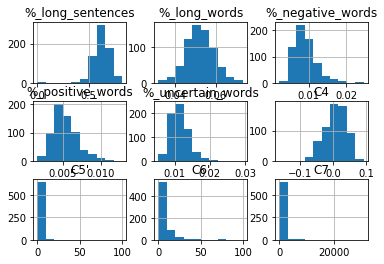

In [14]:
#transform the distribution shapes of the data
#first, look at shapes of cont_data

cont_data.hist()
cont_data.skew()

In [15]:
# use a transformer to transform the shape using log & e^x transformers
# since C6' has many values of 0, we exclude it for now

tr_cont_data = cont_data.copy().drop("C6'", axis = 1)

tr_cont_data_columns = tr_cont_data.columns

tr_cont_data = Transform.skew_transform_log(tr_cont_data)

tr_cont_data.columns = tr_cont_data_columns

In [20]:

tr_cont_data = pd.concat([tr_cont_data, cont_data["C6'"]], axis = 1)
tr_cont_data.head()

,C4,C7,%_long_sentences,%_long_words,%_positive_words,%_negative_words,%_uncertain_words,C5',C6'
0,0.029074,3.938568,1.897288,0.054250,-5.323718,-4.688678,-4.516378,1.351792,11.111111
1,-0.013352,3.255632,1.905517,0.051395,-5.726618,-4.500360,-4.521238,2.487306,0.000000
2,0.020715,1.998503,1.890452,0.061764,-4.457393,-5.071759,-4.473922,1.214656,0.000000
3,0.020023,2.143120,1.715379,0.061630,-4.637032,-4.941521,-4.318578,1.193831,0.000000
4,-0.034895,6.449361,1.799327,0.048550,-5.399715,-4.600461,-4.486414,1.315407,5.000000


In [21]:
tr_cont_data.columns

Index(['C4', 'C7', '%_long_sentences', '%_long_words', '%_positive_words',
       '%_negative_words', '%_uncertain_words', 'C5'', 'C6''],
      dtype='object')

In [22]:
# normalize the data to have a mean=0 and unit variance.

tr_cont_data = Normalize.z_score(tr_cont_data)
tr_cont_data.columns = ['C4', 'C7', '%_long_sentences', '%_long_words', '%_positive_words',
       '%_negative_words', '%_uncertain_words', "C5'", "C6'"]



In [24]:
tr_cont_data.head()

,C4,C7,%_long_sentences,%_long_words,%_positive_words,%_negative_words,%_uncertain_words,C5',C6'
0,0.654566,-0.407052,0.146508,0.308985,-0.106759,0.215867,-0.097507,0.059313,0.525006
1,-0.619777,-0.753353,0.205661,-0.111490,-1.352793,0.817435,-0.118458,2.295653,-0.497238
2,0.403480,-1.390815,0.097368,1.415809,2.572491,-1.007858,0.085530,-0.210771,-0.497238
3,0.382698,-1.317483,-1.161107,1.396092,2.016926,-0.591823,0.755242,-0.251784,-0.497238
4,-1.266863,0.866115,-0.557667,-0.530527,-0.341792,0.497670,0.031676,-0.012345,-0.037228


In [ ]:
data = pd.concat([tr_cont_data, data)

In [17]:
#yj = preprocessing.(method='yeo-johnson', standardize=True)
#np_cont_data = cont_data.values
#yj_cont_data = yj.fit_transform(np_cont_data)

AttributeError: module 'sklearn.preprocessing' has no attribute 'PowerTransformer'

In [25]:
from scipy import stats

z = np.abs(stats.zscore(tr_cont_data))
thres = 3 # your defined threshold
print(np.where(z > thres))

(array([ 12,  22,  32,  49,  57,  64, 104, 105, 109, 157, 161, 165, 174,
       184, 184, 199, 243, 258, 263, 267, 293, 302, 303, 322, 322, 371,
       388, 394, 402, 402, 411, 431, 435, 440, 455, 459, 464, 519, 526,
       530, 541, 614, 646, 652]), array([1, 1, 8, 6, 7, 8, 3, 0, 6, 7, 6, 7, 1, 3, 6, 7, 2, 7, 6, 5, 7, 8,
       0, 1, 8, 6, 8, 5, 6, 8, 5, 1, 8, 6, 8, 8, 2, 7, 3, 8, 7, 4, 1, 8]))


In [26]:
outliers = np.where(z > thres)
d = dict(zip(outliers[0], outliers[1]))
d

{12: 1,
 22: 1,
 32: 8,
 49: 6,
 57: 7,
 64: 8,
 104: 3,
 105: 0,
 109: 6,
 157: 7,
 161: 6,
 165: 7,
 174: 1,
 184: 6,
 199: 7,
 243: 2,
 258: 7,
 263: 6,
 267: 5,
 293: 7,
 302: 8,
 303: 0,
 322: 8,
 371: 6,
 388: 8,
 394: 5,
 402: 8,
 411: 5,
 431: 1,
 435: 8,
 440: 6,
 455: 8,
 459: 8,
 464: 2,
 519: 7,
 526: 3,
 530: 8,
 541: 7,
 614: 4,
 646: 1,
 652: 8}

In [ ]:
for key, value in d:
    data.loc[key, value]

In [12]:

for n in range(1, (data.shape[1] + 1)):
    print(n)
    # create a base classifier used to evaluate a subset of attributes
    from sklearn.linear_model import LogisticRegression
    from sklearn.feature_selection import RFE
    model = LogisticRegression()
    # create the RFE model and select 3 attributes
    rfe = RFE(model, n)
    rfe = rfe.fit(data, y1)
    # summarize the selection of the attributes
    print('Model with the best', n, 'features')
    print(dict(zip(data.columns, rfe.ranking_)))
    


1
Model with the best 1 features
{'C1': 15, 'C2': 5, 'C4': 6, 'C7': 14, '%_long_sentences': 2, '%_long_words': 8, '%_positive_words': 10, '%_negative_words': 9, '%_uncertain_words': 12, "C3'": 13, "C5'": 11, "C6'": 1, 'one_hot_Manufacturing': 3, 'one_hot_Other': 7, 'one_hot_Public Services': 4}
2
Model with the best 2 features
{'C1': 14, 'C2': 4, 'C4': 5, 'C7': 13, '%_long_sentences': 1, '%_long_words': 7, '%_positive_words': 9, '%_negative_words': 8, '%_uncertain_words': 11, "C3'": 12, "C5'": 10, "C6'": 1, 'one_hot_Manufacturing': 2, 'one_hot_Other': 6, 'one_hot_Public Services': 3}
3
Model with the best 3 features
{'C1': 13, 'C2': 3, 'C4': 4, 'C7': 12, '%_long_sentences': 1, '%_long_words': 6, '%_positive_words': 8, '%_negative_words': 7, '%_uncertain_words': 10, "C3'": 11, "C5'": 9, "C6'": 1, 'one_hot_Manufacturing': 1, 'one_hot_Other': 5, 'one_hot_Public Services': 2}
4
Model with the best 4 features
{'C1': 12, 'C2': 2, 'C4': 3, 'C7': 11, '%_long_sentences': 1, '%_long_words': 5, '

In [13]:
data.head()

,C1,C2,C4,C7,%_long_sentences,%_long_words,%_positive_words,%_negative_words,%_uncertain_words,C3',C5',C6',one_hot_Manufacturing,one_hot_Other,one_hot_Public Services
0,122.0,1.0,0.029074,51.345,0.640426,0.054250,0.004875,0.009199,0.010929,1,3.864345,11.111111,1,0,0
1,259.0,0.0,-0.013352,25.936,0.644753,0.051395,0.003258,0.011105,0.010876,0,12.028832,0.000000,1,0,0
2,90.0,1.0,0.020715,7.378,0.636816,0.061764,0.011593,0.006271,0.011403,0,3.369134,0.000000,1,0,0
3,209.0,1.0,0.020023,8.526,0.539634,0.061630,0.009686,0.007144,0.013319,0,3.299697,0.000000,1,0,0
4,80.0,1.0,-0.034895,632.298,0.587413,0.048550,0.004518,0.010047,0.011261,1,3.726269,5.000000,0,0,1
